In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
def load_data(data_dir='Datasets'):
    # Define file paths
    train_data_path = os.path.join(data_dir, 'train_data.npy')
    train_labels_path = os.path.join(data_dir, 'train_labels.npy')
    validation_data_path = os.path.join(data_dir, 'validation_data.npy')
    validation_labels_path = os.path.join(data_dir, 'validation_labels.npy')
    test_data_path = os.path.join(data_dir, 'test_data.npy')
    test_labels_path = os.path.join(data_dir, 'test_labels.npy')
    
    # Load data
    X_train = np.load(train_data_path)
    y_train = np.load(train_labels_path)
    X_val = np.load(validation_data_path)
    y_val = np.load(validation_labels_path)
    X_test = np.load(test_data_path)
    y_test = np.load(test_labels_path)
    
    print("Data Loading Complete.")
    print(f"Training Data Shape: {X_train.shape}")
    print(f"Training Labels Shape: {y_train.shape}")
    print(f"Validation Data Shape: {X_val.shape}")
    print(f"Validation Labels Shape: {y_val.shape}")
    print(f"Testing Data Shape: {X_test.shape}")
    print(f"Testing Labels Shape: {y_test.shape}\n")
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [4]:
def build_lstm_model(input_shape):
    """
    Builds and compiles an LSTM model.

    Parameters:
    - input_shape (tuple): Shape of the input data (num_frames, num_features).

    Returns:
    - model (tf.keras.Model): Compiled LSTM model.
    """
    model = Sequential([
        LSTM(128, input_shape=input_shape, return_sequences=True),
        Dropout(0.3),
        LSTM(64),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    model.summary()
    return model

In [5]:
def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss over epochs.

    Parameters:
    - history (tf.keras.callbacks.History): History object returned by model.fit().
    """
    # Accuracy Plot
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

Data Loading Complete.
Training Data Shape: (18, 48, 40)
Training Labels Shape: (18,)
Validation Data Shape: (3, 48, 40)
Validation Labels Shape: (3,)
Testing Data Shape: (5, 48, 40)
Testing Labels Shape: (5,)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 48, 128)           86528     
                                                                 
 dropout (Dropout)           (None, 48, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                           

C:\Users\jakep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - ETA: 0s - loss: 0.6325 - accuracy: 0.7778
Epoch 3: val_loss improved from 0.65301 to 0.63641, saving model to best_lstm_model.h5
1/1 [==============================] - 0s 166ms/step - loss: 0.6325 - accuracy: 0.7778 - val_loss: 0.6364 - val_accuracy: 0.6667
Epoch 4/50
1/1 [==============================] - ETA: 0s - loss: 0.6071 - accuracy: 0.8333
Epoch 4: val_loss improved from 0.63641 to 0.63057, saving model to best_lstm_model.h5
1/1 [==============================] - 0s 161ms/step - loss: 0.6071 - accuracy: 0.8333 - val_loss: 0.6306 - val_accuracy: 0.6667
Epoch 5/50
1/1 [==============================] - ETA: 0s - loss: 0.5423 - accuracy: 0.8333
Epoch 5: val_loss did not improve from 0.63057
1/1 [==============================] - 0s 112ms/step - loss: 0.5423 - accuracy: 0.8333 - val_loss: 0.6364 - val_accuracy: 0.6667
Epoch 6/50
1/1 [==============================] - ETA: 0s - loss: 0.5298 - accuracy: 0.8333
Epoch 6: val_loss did not improve f

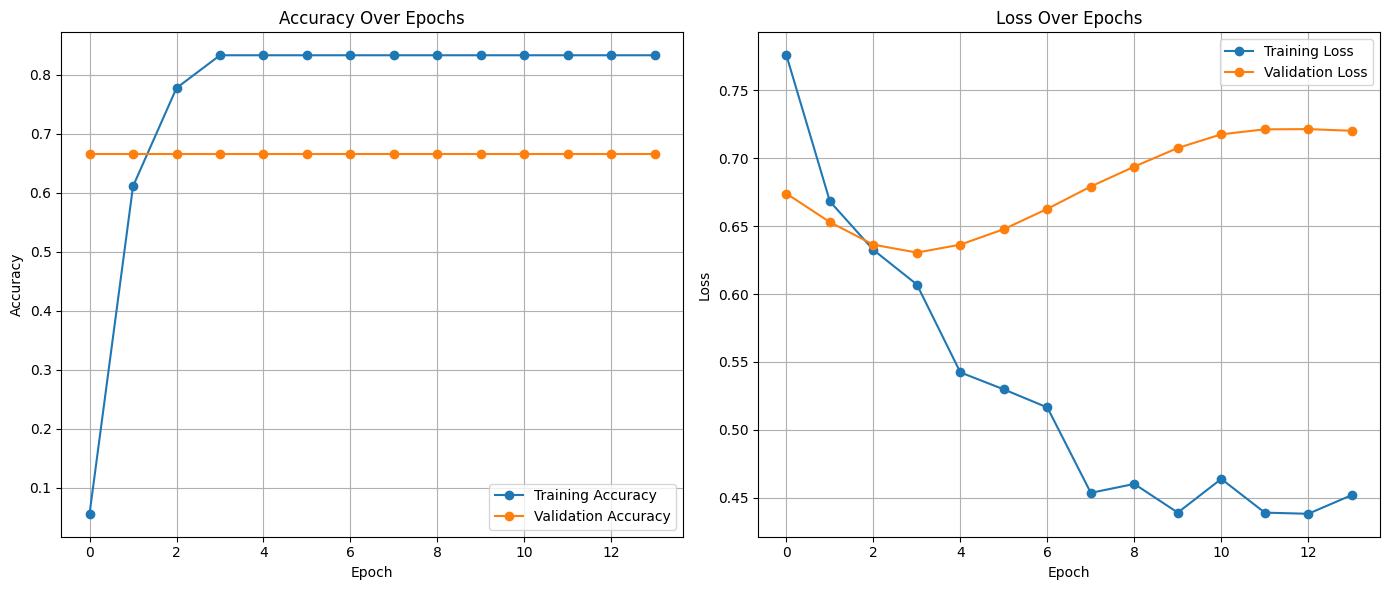

Test Loss: 0.5765, Test Accuracy: 0.8000


In [6]:
X_train, y_train, X_val, y_val, X_test, y_test = load_data(data_dir='Datasets')

# Define input shape based on the data
num_frames = X_train.shape[1]      # e.g., 48
num_features = X_train.shape[2]    # e.g., 40
input_shape = (num_frames, num_features)

# Build the LSTM model
model = build_lstm_model(input_shape=input_shape)

# Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath='best_lstm_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, model_checkpoint],
    verbose=1
)

# Plot training history
plot_training_history(history)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
